In [1]:
!pip install comet_ml

In [2]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="TFeUn29BbDYHxZnuv9Uy9X3R0",
    project_name="Climate_change_challenge-2022",
    workspace="keltings",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Run will not be logged 
For more details, please refer to: https://www.comet.ml/docs/python-sdk/warnings-errors/
Traceback (most recent call last):
  File "C:\Users\kelida\anaconda3\lib\site-packages\comet_ml\experiment.py", line 864, in _start
    self.alive = self._setup_streamer()
  File "C:\Users\kelida\anaconda3\lib\site-packages\comet_ml\_online.py", line 306, in _setup_streamer
    self._initialize_streamer(full_ws_url, initial_offset)
  File "C:\Users\kelida\anaconda3\lib\site-packages\comet_ml\_online.py", line 367, in _initialize_streamer
    self.ws_connection.wait_for_connection()
  File "C:\Users\kelida\anaconda3\lib\site-packages\comet_ml\connection.py", line 1110, in wait_for_connection
    raise ValueError("Could not connect to server after multiple tries.")
ValueError: Could not connect

In [3]:
! pip install wordcloud

###### Import Necessary Dependencies

In [4]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

###### Read and load the dataset

In [5]:
df = pd.read_csv('data/train.csv')
df

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732


###### Exploratory Data Analysis 

Five top records of data

In [6]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


###### Columns/features in data

In [7]:
df.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

###### Length of the dataset

In [8]:
print('length of data is', len(df))

length of data is 15819


###### Shape of data

In [9]:
df.shape

(15819, 3)

###### Data information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


###### Checking for Null values

In [11]:
np.sum(df.isnull().any(axis=1))

0

###### Rows and columns in the dataset

In [12]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   3
Count of rows in the data is:   15819


###### Check unique Target Values

In [13]:
df['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

###### Check the number of target values

In [14]:
df['sentiment'].nunique()

4

##### Data Visualization of Target Variables

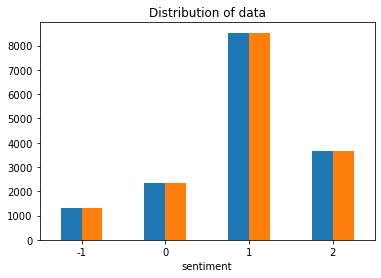

In [15]:
# Plotting the distribution for dataset.
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels([-1,0,1,2], rotation=0)
# Storing data in lists.
message, sentiment = list(df['message']), list(df['sentiment'])

<AxesSubplot:xlabel='sentiment', ylabel='count'>

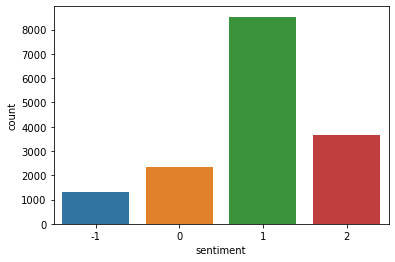

In [16]:
import seaborn as sns
sns.countplot(x='sentiment', data=df)

##### Data Preprocessing 

In the above-given problem statement before training the model, we performed various pre-processing steps on the dataset that mainly dealt with removing stopwords, removing emojis. The text document is then converted into the lowercase for better generalization.

Punctuations were cleaned and removed thereby reducing the unnecessary noise from the dataset. After that, we removed the repeating characters from the words along with removing the URLs as they do not have any significant importance.

At last, we then performed Stemming(reducing the words to their derived stems) and Lemmatization(reducing the derived words to their root form known as lemma) for better results.

###### Selecting the message and Target column for our further analysis

In [17]:
data=df[['message','sentiment']]

###### Separating sentiments

In [18]:
# segregating dataframe for analyzing individual sentiments
news=data[(data['sentiment']==2)]
neutral=data[(data['sentiment']==0)]
pro=data[(data['sentiment']==1)]
anti=data[(data['sentiment']==-1)]


###### Combining the different tweets

In [19]:
dataset = pd.concat([news, neutral, pro, anti])

###### Making statement message in lower case

In [20]:
dataset['message']=dataset['message'].str.lower()
dataset['message'].tail()

15704    rt @dbongino: we're at the point w/the delusio...
15705    rt @joshdcaplan: al gore admits paris accord w...
15711    rt @joshnoneyabiz: funny the same people who b...
15806    rt @herbermp: @sness5561_ness al gore is a idi...
15817    rt @sara8smiles: hey liberals the climate chan...
Name: message, dtype: object

###### Defining set containing all stopwords in English.

In [21]:
from nltk.corpus import stopwords
stopwordlist = stopwords.words('english')

###### Cleaning and removing the above stop words list from the tweet text

In [22]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(message):
    return " ".join([word for word in str(message).split() if word not in STOPWORDS])
df['message_clean'] = dataset['message'].apply(lambda message: cleaning_stopwords(message))
df['message_clean'].head()

0    polyscimajor epa chief think carbon dioxide ma...
1      like lack evidence anthropogenic global warming
2    rt @rawstory: researchers say three years act ...
3    #todayinmaker# wired : 2016 pivotal year war c...
4    rt @soynoviodetodas: 2016, racist, sexist, cli...
Name: message_clean, dtype: object

###### Cleaning and removing punctuations

In [23]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(message):
    translator = str.maketrans('', '', punctuations_list)
    return message.translate(translator)
df['message_clean']= df['message_clean'].apply(lambda x: cleaning_punctuations(x))
df['message_clean'].tail()

15814    rt ezlusztig took material global warming lgbt...
15815    rt washingtonpost climate change could breakin...
15816    notiven rt nytimesworld what trump actually be...
15817    rt sara8smiles hey liberals climate change cra...
15818    rt chetcannon kurteichenwalds climate change e...
Name: message_clean, dtype: object

###### Cleaning and removing repeating characters

In [24]:
def cleaning_repeating_char(message):
    return re.sub(r'(.)1+', r'1', message)
df['message_clean'] = df['message_clean'].apply(lambda x: cleaning_repeating_char(x))
df['message_clean'].tail()

15814    rt ezlusztig took material global warming lgbt...
15815    rt washingtonpost climate change could breakin...
15816    notiven rt nytimesworld what trump actually be...
15817    rt sara8smiles hey liberals climate change cra...
15818    rt chetcannon kurteichenwalds climate change e...
Name: message_clean, dtype: object

###### Cleaning and removing URL’s

In [25]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['message_clean'] = df['message_clean'].apply(lambda x: cleaning_URLs(x))
df['message_clean'].tail()

15814    rt ezlusztig took material global warming lgbt...
15815    rt washingtonpost climate change could breakin...
15816    notiven rt nytimesworld what trump actually be...
15817    rt sara8smiles hey liberals climate change cra...
15818    rt chetcannon kurteichenwalds climate change e...
Name: message_clean, dtype: object

###### Cleaning and removing Numeric numbers

In [26]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['message_clean'] = df['message_clean'].apply(lambda x: cleaning_numbers(x))
df['message_clean'].tail()

15814    rt ezlusztig took material global warming lgbt...
15815    rt washingtonpost climate change could breakin...
15816    notiven rt nytimesworld what trump actually be...
15817    rt sarasmiles hey liberals climate change crap...
15818    rt chetcannon kurteichenwalds climate change e...
Name: message_clean, dtype: object

###### Getting tokenization of tweet text

In [27]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
df['message_clean'] = df['message_clean'].apply(tokenizer.tokenize)
df['message_clean'].tail()

15814    [rt, ezlusztig, took, material, global, warmin...
15815    [rt, washingtonpost, climate, change, could, b...
15816    [notiven, rt, nytimesworld, what, trump, actua...
15817    [rt, sarasmiles, hey, liberals, climate, chang...
15818    [rt, chetcannon, kurteichenwalds, climate, cha...
Name: message_clean, dtype: object

###### Applying Stemming

In [28]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    message_stemmed = [st.stem(word) for word in data]
    return data
df['message_clean']= df['message_clean'].apply(lambda x: stemming_on_text(x))
df['message_clean'].head()

0    [polyscimajor, epa, chief, think, carbon, diox...
1    [like, lack, evidence, anthropogenic, global, ...
2    [rt, rawstory, researchers, say, three, years,...
3    [todayinmaker, wired, pivotal, year, war, clim...
4    [rt, soynoviodetodas, racist, sexist, climate,...
Name: message_clean, dtype: object

###### Applying Lemmatizer

In [29]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    messege_lemmatized = [lm.lemmatize(word) for word in data]
    return ' '.join(messege_lemmatized)
df['message_clean'] = df['message_clean'].apply(lambda x:lemmatizer_on_text(x))
df['message_clean'].head()

0    polyscimajor epa chief think carbon dioxide ma...
1      like lack evidence anthropogenic global warming
2    rt rawstory researcher say three year act clim...
3    todayinmaker wired pivotal year war climate ch...
4    rt soynoviodetodas racist sexist climate chang...
Name: message_clean, dtype: object

In [30]:
df

,sentiment,message,tweetid,message_clean
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief think carbon dioxide ma...
1,1,It's not like we lack evidence of anthropogeni...,126103,like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three ye...,698562,rt rawstory researcher say three year act clim...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,todayinmaker wired pivotal year war climate ch...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,rt soynoviodetodas racist sexist climate chang...
...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,rt ezlusztig took material global warming lgbt...
15815,2,RT @washingtonpost: How climate change could b...,17856,rt washingtonpost climate change could breakin...
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,notiven rt nytimesworld what trump actually be...
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,rt sarasmiles hey liberal climate change crap ...


###### Separating input feature and label

In [31]:
X=df.message_clean

y=dataset.sentiment

###### Plot a cloud of words for news, pro, neutral and anti tweets

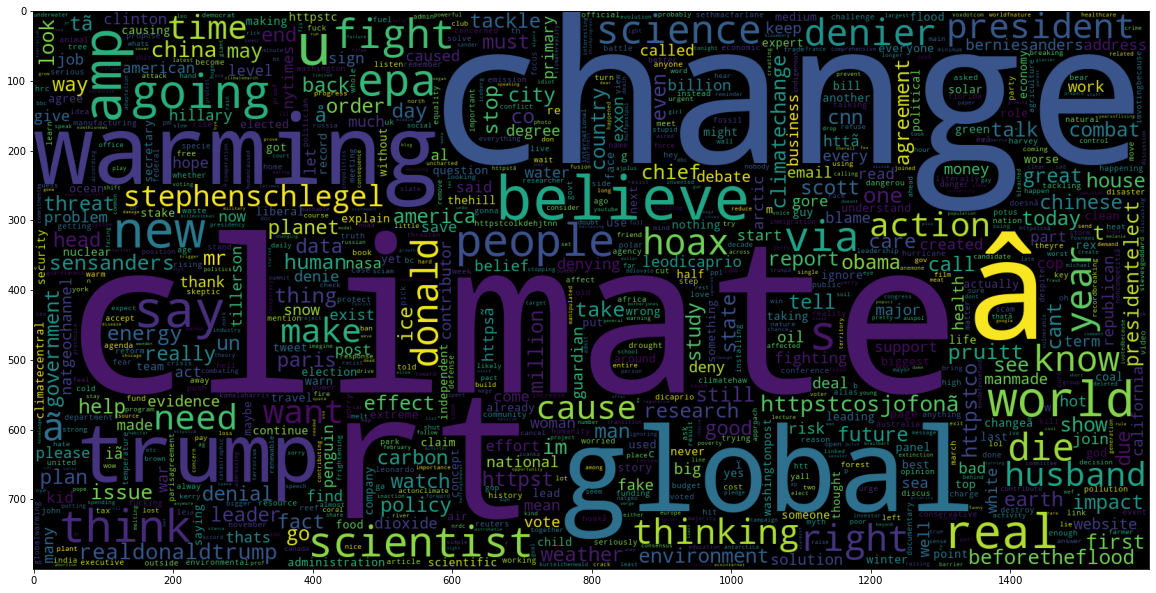

In [32]:
news = df['message_clean']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(news))
plt.imshow(wc)

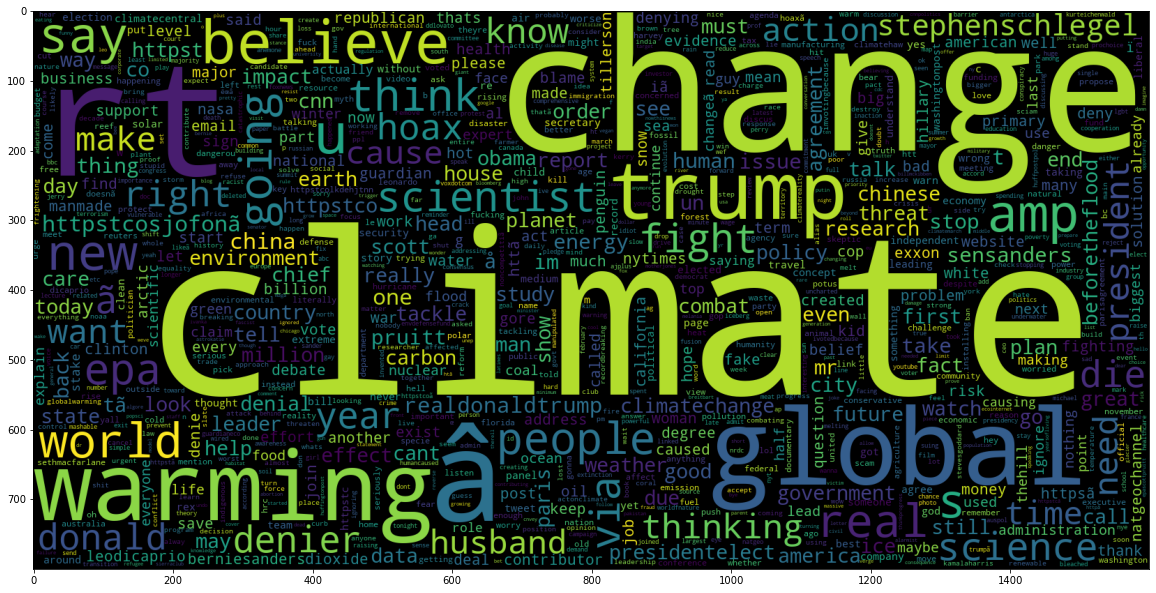

In [33]:
pro = df['message_clean']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(pro))
plt.imshow(wc)

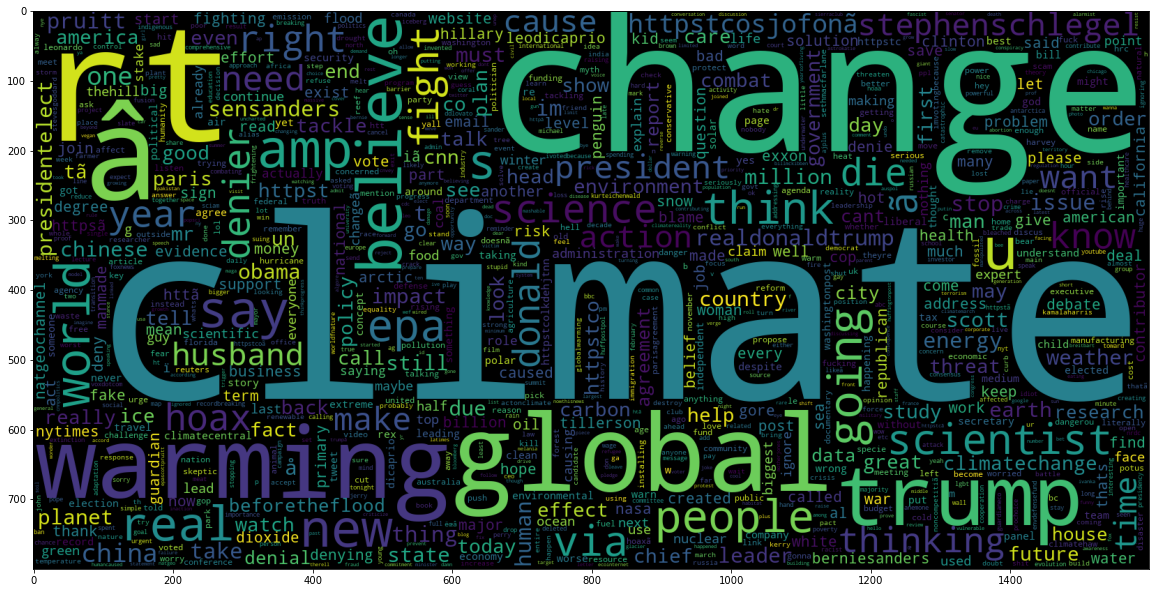

In [34]:
neutral = df['message_clean']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(neutral))
plt.imshow(wc)

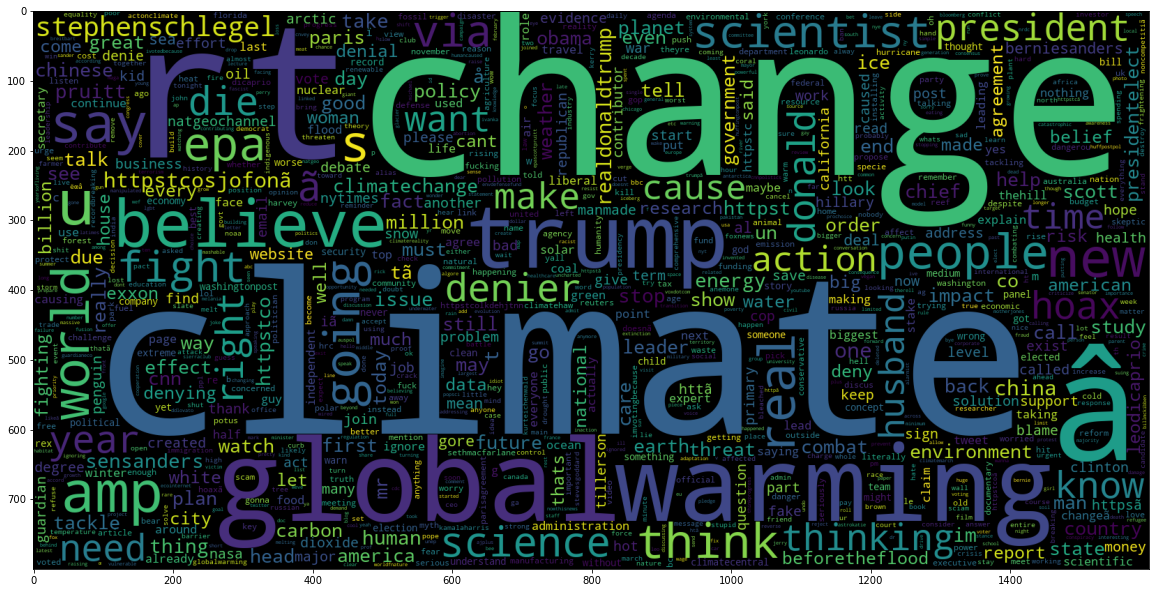

In [35]:
anti = df['message_clean']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(anti))
plt.imshow(wc)

###### Bag of Words

Now, we will use the Bag of Words Model(BOW), which is used to represent the text in the form of a bag of words,i.e. the grammar and the order of words in a sentence are not given any importance, instead, multiplicity,i.e. (the number of times a word occurs in a document) is the main point of concern.

Basically, it describes the total occurrence of words within a document.

###### Scikit-Learn provides a neat way of performing the bag of words technique using CountVectorizer.

Now, we will convert the text data into vectors, by fitting and transforming the corpus that we have created.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(df['message_clean'])
X = df.message_clean
y = df.sentiment

###### Splitting our data into Train and Test Subset

In [38]:
# Separating the 80% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =0)

###### Transforming Dataset using TF-IDF Vectorizer
 Fit the TF-IDF Vectorizer

In [39]:
vectoriser = TfidfVectorizer(stop_words='english', max_df=0.8)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  26056


C:\Users\kelida\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
#Transform the data using TF-IDF Vectorizer

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

##### Function For Model Evaluation

After training the model we then apply the evaluation measures to check how the model is performing. Accordingly, we use the following evaluation parameters to check the performance of the models respectively :

Accuracy Score
Confusion Matrix with Plot
ROC-AUC Curve

In [41]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and  Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    

##### Model Building

In the problem statement we have used three different models respectively :

Bernoulli Naive Bayes
SVM (Support Vector Machine)
Logistic Regression
The idea behind choosing these models is that we want to try all the classifiers on the dataset ranging from simple ones to complex models and then try to find out the one which gives the best performance among them.

###### BernoulliB

In [42]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       249
           0       0.89      0.07      0.13       473
           1       0.60      0.98      0.74      1701
           2       0.86      0.40      0.54       741

    accuracy                           0.63      3164
   macro avg       0.59      0.36      0.35      3164
weighted avg       0.66      0.63      0.55      3164



C:\Users\kelida\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kelida\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kelida\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Plot the ROC-AUC Curve for model-1

In [43]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

          -1       0.75      0.45      0.57       249
           0       0.60      0.41      0.49       473
           1       0.77      0.87      0.82      1701
           2       0.72      0.75      0.73       741

    accuracy                           0.74      3164
   macro avg       0.71      0.62      0.65      3164
weighted avg       0.73      0.74      0.73      3164



In [44]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

          -1       0.78      0.39      0.52       249
           0       0.64      0.38      0.47       473
           1       0.74      0.89      0.81      1701
           2       0.73      0.71      0.72       741

    accuracy                           0.73      3164
   macro avg       0.72      0.59      0.63      3164
weighted avg       0.73      0.73      0.72      3164

